In [1]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 46.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2021_altın_mudahale/train.csv', encoding='latin-1')

In [5]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,6000,"âºchase freedom 5x: activate q1 2022, finish ...",0.000000,0.00,Neutral
1,6001,card-as-a-service companies provide comprehens...,0.000000,0.00,Neutral
2,6002,ðð³the deserve edu mastercard credit card...,0.166667,0.20,Positive
3,6003,$smme news: smartmetric reveals 60% existing c...,0.750000,0.25,Positive
4,6004,i'm happy quoted piece sharing insights (and d...,1.000000,0.80,Positive


In [6]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2021_altın_mudahale/test.csv', encoding='latin-1')

In [7]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"50,000 finnish industrial workers threaten str...",0.000000,0.000000,Neutral
1,1,happened btc$100k eoy ð¤·ââï¸ reminds fo...,0.000000,0.000000,Neutral
2,2,plop supercooled ice ð¦ copper gold swimming...,0.400000,-0.150000,Negative
3,3,jp morgan turns bearish anything-- especially ...,1.000000,0.000000,Neutral
4,4,2021 year clean energy finally faced mining pr...,0.679451,0.157656,Positive


In [8]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = data_train,
                 text_column = 'tweet',
                 label_columns = 'Analysis',
                 val_df = data_test,
                 maxlen = 400,
                 ngram_range=2,
                 preprocess_mode = 'bert')

['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      1.0       0.0
1       0.0      1.0       0.0
2       0.0      0.0       1.0
3       0.0      0.0       1.0
4       0.0      0.0       1.0
['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      1.0       0.0
1       0.0      1.0       0.0
2       1.0      0.0       0.0
3       0.0      1.0       0.0
4       0.0      0.0       1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [9]:
X_train[0].shape

(2928, 400)

In [10]:
model = text.text_classifier(name='bert',
                            train_data = (X_train, y_train),
                            preproc = preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [11]:
# Get learning rate.
learner = ktrain.get_learner(model = model,
                            train_data = (X_train, y_train),
                            val_data = (X_test, y_test),
                            batch_size = 6)

In [12]:
# get optimal learning rate.
#learner.lr_find(start_lr=1e-07, max_epochs=10)
#learner.lr_plot()

In [13]:
history = learner.fit_onecycle(lr = 2e-5, epochs = 3) #2e-5, 1e-4




begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
488/488 [==============================] - 91s 151ms/step - loss: 0.3386 - accuracy: 0.8668 - val_loss: 1.0464 - val_accuracy: 0.6915
Epoch 2/3
488/488 [==============================] - 70s 143ms/step - loss: 0.0542 - accuracy: 0.9822 - val_loss: 1.0186 - val_accuracy: 0.7197
Epoch 3/3
488/488 [==============================] - 70s 143ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 1.0488 - val_accuracy: 0.7592


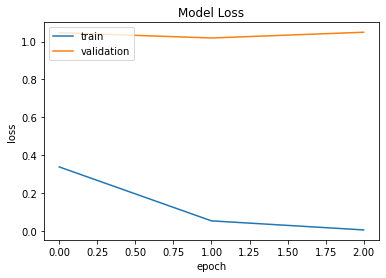

In [14]:
learner.plot('loss')

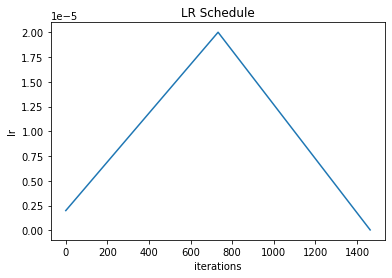

In [15]:
learner.plot('lr')

In [16]:
learner.validate()

188/188 [==============================] - 26s 115ms/step
              precision    recall  f1-score   support

           0       0.33      0.17      0.23       725
           1       0.80      0.89      0.84      3349
           2       0.77      0.76      0.76      1926

    accuracy                           0.76      6000
   macro avg       0.63      0.61      0.61      6000
weighted avg       0.73      0.76      0.74      6000



array([[ 125,  398,  202],
       [ 140, 2974,  235],
       [ 115,  355, 1456]])